<a href="https://colab.research.google.com/github/AchiengMary/female_health_models/blob/main/Ovarian_Cysts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('Ovarian_Cyst.csv')  # or .xlsx

# Preview data
print(df.head())
print(df.info())
print(df.describe())

  Patient ID  Age Menopause Status  Cyst Size cm  Cyst Growth Rate cm/month  \
0    OC-1000   52  Post-menopausal           3.2                      -0.34   
1    OC-1001   62  Post-menopausal           7.9                       0.84   
2    OC-1002   59  Post-menopausal           2.2                       0.50   
3    OC-1003   64  Post-menopausal           5.5                       1.11   
4    OC-1004   43  Post-menopausal           4.0                       0.90   

   CA 125 Level Ultrasound Features                         Reported Symptoms  \
0            19       Septated cyst             Pelvic pain, Nausea, Bloating   
1           111       Septated cyst                                  Bloating   
2           123    Hemorrhagic cyst  Pelvic pain, Irregular periods, Bloating   
3           116          Solid mass                 Nausea, Irregular periods   
4            98    Hemorrhagic cyst       Irregular periods, Bloating, Nausea   

  Recommended Management Date of Exam 

Patient ID                   0
Age                          0
Menopause Status             0
Cyst Size cm                 0
Cyst Growth Rate cm/month    0
CA 125 Level                 0
Ultrasound Features          0
Reported Symptoms            0
Recommended Management       0
Date of Exam                 0
Region                       0
dtype: int64


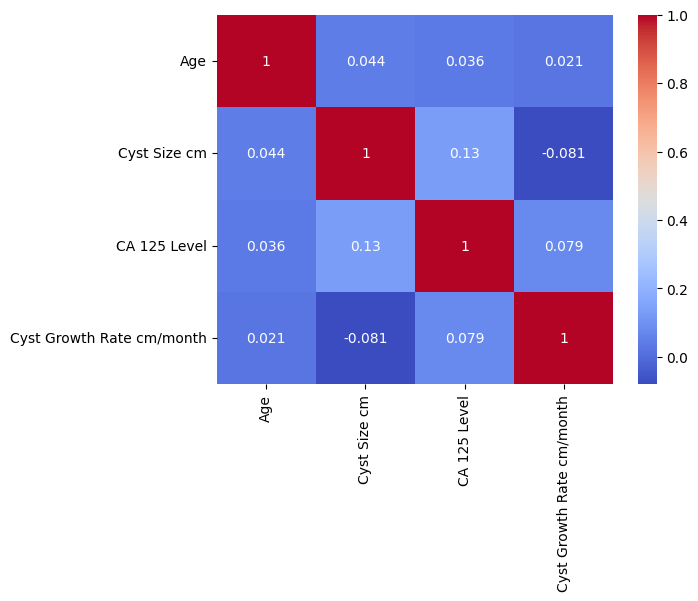

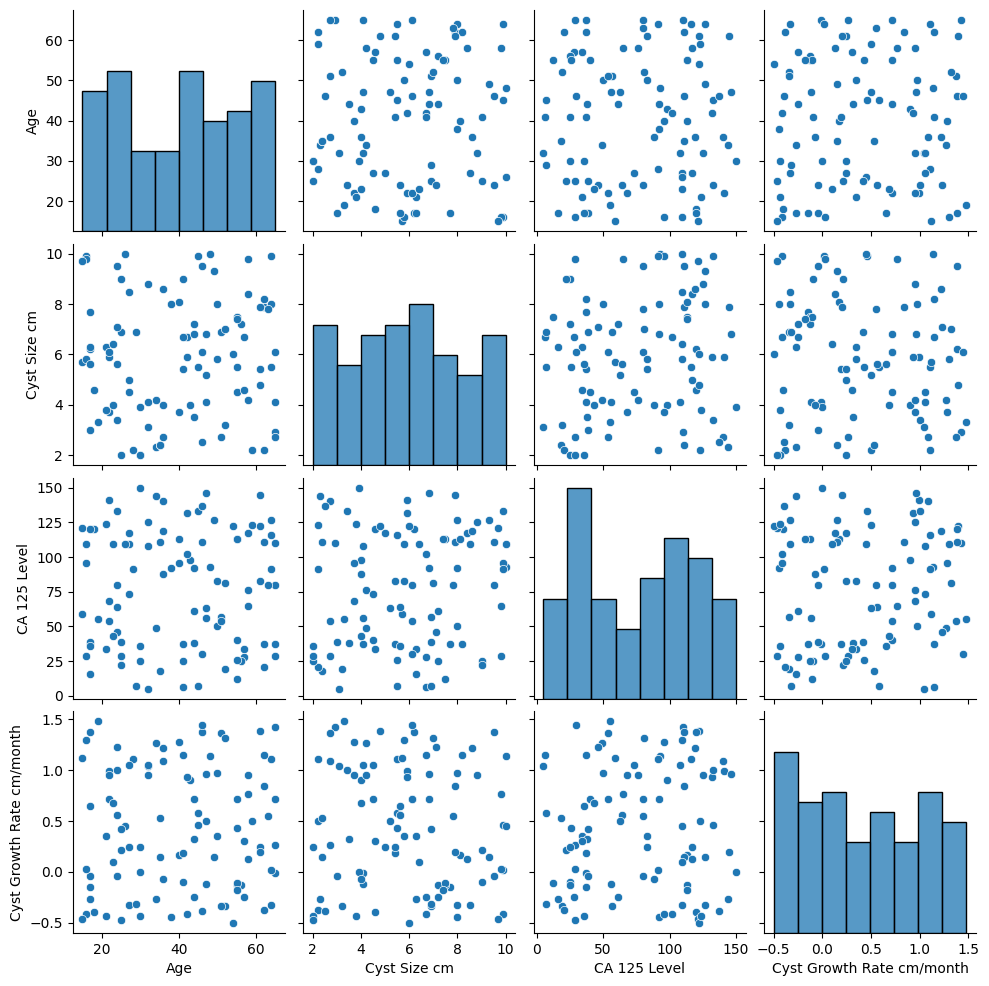

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nulls
print(df.isnull().sum())

# Correlation heatmap
numerical_cols = ['Age', 'Cyst Size cm', 'CA 125 Level', 'Cyst Growth Rate cm/month']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')

# Pairplot
sns.pairplot(df[numerical_cols])

<Axes: xlabel='Cyst Growth Rate cm/month', ylabel='Count'>

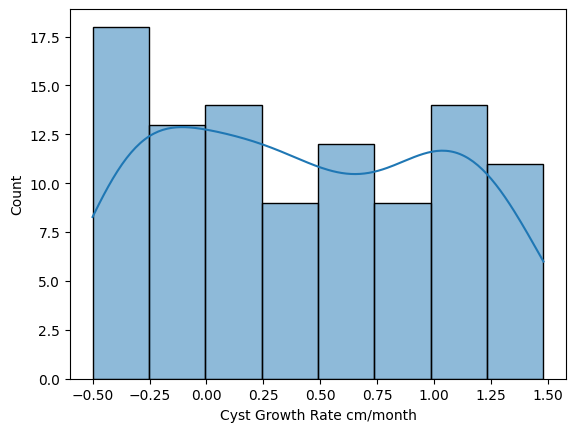

In [7]:
# Target distribution
sns.histplot(df['Cyst Growth Rate cm/month'], kde=True)

<Axes: xlabel='Menopause Status', ylabel='Cyst Growth Rate cm/month'>

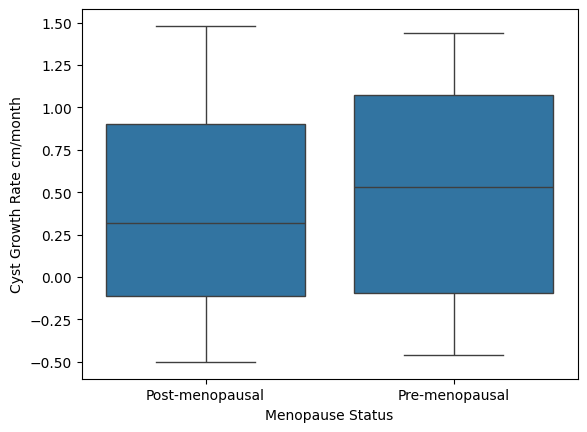

In [10]:
# Box plots for categorical vs target
sns.boxplot(x='Menopause Status', y='Cyst Growth Rate cm/month', data=df)

<Axes: xlabel='Region', ylabel='Cyst Growth Rate cm/month'>

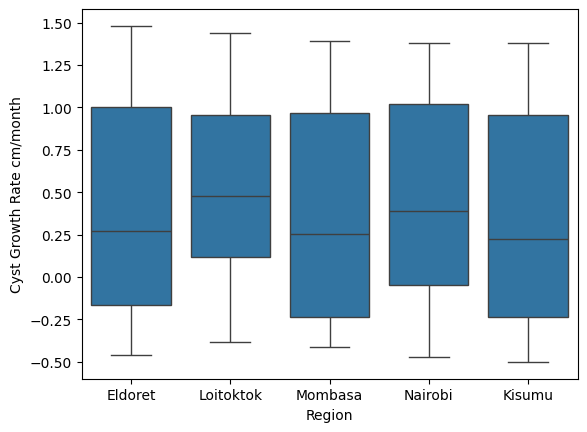

In [11]:
sns.boxplot(x='Region', y='Cyst Growth Rate cm/month', data=df)

Patient ID — not predictive

Date of Exam — may not affect growth rate unless doing time-series

Reported Symptoms — per our decision

ultrasound Features — we’ll assume it's textual for now, and ignore unless structured

In [13]:
df.drop(['Patient ID', 'Date of Exam', 'Reported Symptoms', 'Ultrasound Features'], axis=1, inplace=True)

In [14]:
print(df.isnull().sum())

Age                          0
Menopause Status             0
Cyst Size cm                 0
Cyst Growth Rate cm/month    0
CA 125 Level                 0
Recommended Management       0
Region                       0
dtype: int64


In [15]:
df = pd.get_dummies(df, columns=['Menopause Status', 'Region'], drop_first=True)

In [16]:
print(df.columns)
print(df.head())

Index(['Age', 'Cyst Size cm', 'Cyst Growth Rate cm/month', 'CA 125 Level',
       'Recommended Management', 'Menopause Status_Pre-menopausal',
       'Region_Kisumu', 'Region_Loitoktok', 'Region_Mombasa',
       'Region_Nairobi'],
      dtype='object')
   Age  Cyst Size cm  Cyst Growth Rate cm/month  CA 125 Level  \
0   52           3.2                      -0.34            19   
1   62           7.9                       0.84           111   
2   59           2.2                       0.50           123   
3   64           5.5                       1.11           116   
4   43           4.0                       0.90            98   

  Recommended Management  Menopause Status_Pre-menopausal  Region_Kisumu  \
0            Observation                            False          False   
1             Medication                            False          False   
2               Referral                            False          False   
3             Medication                            

In [17]:
#splitting the data
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Cyst Growth Rate cm/month', axis=1)
y = df['Cyst Growth Rate cm/month']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Optional: Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)

X_train shape: (80, 9)
X_test shape: (20, 9)
y_train shape: (80,)


In [ ]:
Trying out a few regression models

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")

ValueError: could not convert string to float: 'Observation'

In [19]:
print(X_train.dtypes)

Age                                  int64
Cyst Size cm                       float64
CA 125 Level                         int64
Recommended Management              object
Menopause Status_Pre-menopausal       bool
Region_Kisumu                         bool
Region_Loitoktok                      bool
Region_Mombasa                        bool
Region_Nairobi                        bool
dtype: object


In [20]:
# One-hot encode Recommended Management
df = pd.get_dummies(df, columns=['Recommended Management'], drop_first=True)

# Rebuild X and y
X = df.drop('Cyst Growth Rate cm/month', axis=1)
y = df['Cyst Growth Rate cm/month']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")

TypeError: got an unexpected keyword argument 'squared'

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Manual RMSE
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")



Linear Regression
R² Score: -0.327
RMSE: 0.658
MAE: 0.554

Random Forest
R² Score: -0.529
RMSE: 0.706
MAE: 0.599


R² Score < 0 (bad)
A negative R² means the model is doing worse than predicting the mean.

It indicates the models are failing to capture a useful pattern in the data.

⚠️ MAE and RMSE are non-zero
These show the average and root-mean-square error in cyst growth rate (in cm/month).

Values ~0.5–0.7 may be large or small depending on your typical growth rates.

🔍 Why Performance May Be Poor
Let’s troubleshoot possible reasons:

1. Small Dataset (100 rows)
Random Forest and Linear Regression need more data to generalize well.

2. Weak Features
Maybe features like Age, Region, Menopause Status, etc., don’t strongly predict growth rate.

3. Target Variability
Cyst growth could be influenced by medical or biological variables not in your dataset (e.g., hormone levels, genetics, ultrasound morphology details).

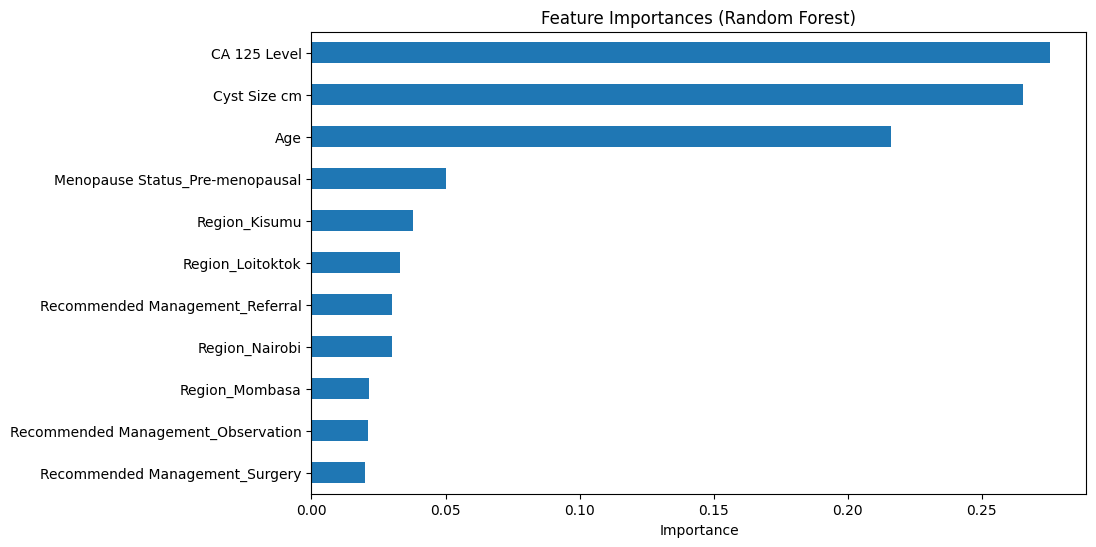

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = models["Random Forest"].feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plot
plt.figure(figsize=(10, 6))
forest_importances.sort_values().plot(kind='barh')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

Option A: Improve This Model
Feature engineering (e.g., binning ages, combining menopause with age)

Try more models (Gradient Boosting, XGBoost)

Add interaction terms (e.g., Region × Management)

Normalize or scale features (especially for Linear Regression)

Option B: Focus on Insight
Use feature importance + correlation plots to interpret patterns, even if prediction isn’t strong

Gradient Boosting Regressor
This model:

Handles non-linearity well

Often outperforms Random Forest on tabular data

Is less likely to overfit small datasets compared to Random Forest

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Add Gradient Boosting to the models dictionary
models["Gradient Boosting"] = GradientBoostingRegressor(random_state=42)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")


Linear Regression
R² Score: -0.327
RMSE: 0.658
MAE: 0.554

Random Forest
R² Score: -0.529
RMSE: 0.706
MAE: 0.599

Gradient Boosting
R² Score: -1.099
RMSE: 0.827
MAE: 0.653


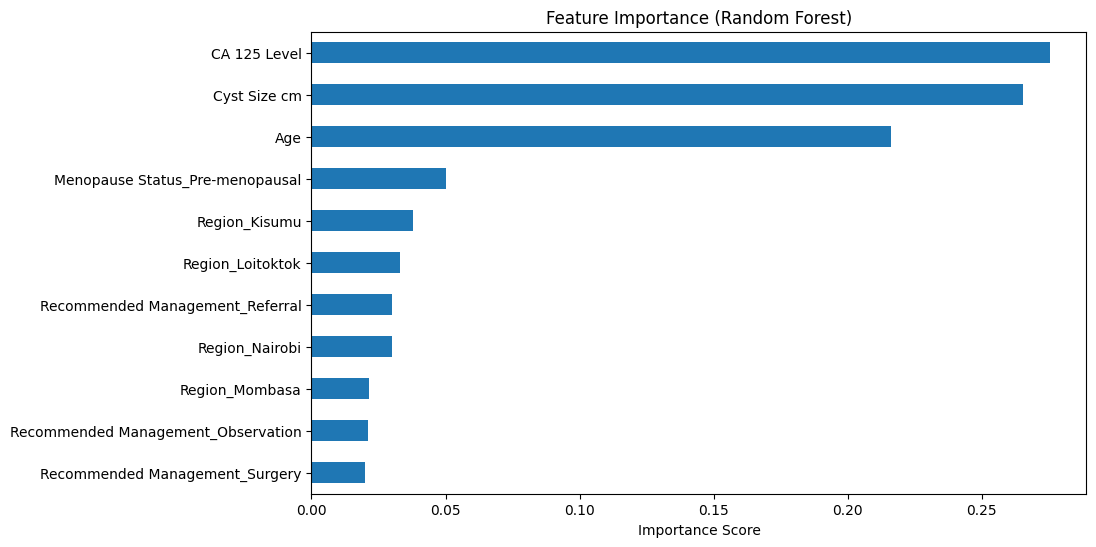

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

importances = models["Random Forest"].feature_importances_
features = X.columns
forest_importances = pd.Series(importances, index=features)

# Plot
plt.figure(figsize=(10, 6))
forest_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [29]:
import joblib

# Save the best-performing model (Linear Regression)
joblib.dump(models["Linear Regression"], "growth_model.pkl")

['growth_model.pkl']